In [10]:
from ray.tune import Analysis
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import plotly.express as px

In [11]:
user_home = os.path.expanduser("~")
analysis = Analysis(os.path.join(user_home, "ray_results", "ntk_error"))

In [12]:
configs = analysis.get_all_configs()
dfs = analysis.trial_dataframes
trials = list(configs.keys())

In [24]:
for trial in trials:
    df = dfs[trial]
    for key, val in configs[trial].items():
        df[f"config/{key}"] = val

In [25]:
df_all = pd.concat([y for y in analysis.trial_dataframes.values()])

In [26]:
df_all.columns

Index(['time_this_iter_s', 'done', 'timesteps_total', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', '_metric/input', '_metric/out', '_metric/delta_mean',
       '_metric/delta_std', '_metric/n_init', '_metric/n_inp',
       '_metric/inp_chunk', 'perf/cpu_util_percent', 'perf/ram_util_percent',
       'config/_gin__lfail__sample_from', 'config/_gin__nhid__choice',
       'config/_gin__nunits__choice', 'config/_gin__plevel__uniform',
       'config/config_gin', 'config/log_sys_usage'],
      dtype='object')

In [43]:
config_columns = [c for c in df_all.columns if c.startswith("config/_gin")]
metric_columns = [c for c in df_all.columns if c.startswith("_metric")]

In [44]:
for config, df in df_all.groupby(config_columns):
    config = dict(zip(config_columns, config))
    print(config)

{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 0, 'config/_gin__nunits__choice': 1, 'config/_gin__plevel__uniform': 0.27014998164456183}
{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 0, 'config/_gin__nunits__choice': 15, 'config/_gin__plevel__uniform': 0.18753763596816175}
{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 1, 'config/_gin__nunits__choice': 15, 'config/_gin__plevel__uniform': 0.6155846417172366}
{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 1, 'config/_gin__nunits__choice': 30, 'config/_gin__plevel__uniform': 0.30763745933424624}
{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 1, 'config/_gin__nunits__choice': 200, 'config/_gin__plevel__uniform': 0.25084062236559346}
{'config/_gin__lfail__sample_from': 0, 'config/_gin__nhid__choice': 2, 'config/_gin__nunits__choice': 30, 'config/_gin__plevel__uniform': 0.04295374879713132}
{'config/_gin__lfail__sample_from': 0, 'config/

In [45]:
config_columns + metric_columns

['config/_gin__lfail__sample_from',
 'config/_gin__nhid__choice',
 'config/_gin__nunits__choice',
 'config/_gin__plevel__uniform',
 '_metric/input',
 '_metric/out',
 '_metric/delta_mean',
 '_metric/delta_std',
 '_metric/n_init',
 '_metric/n_inp',
 '_metric/inp_chunk']

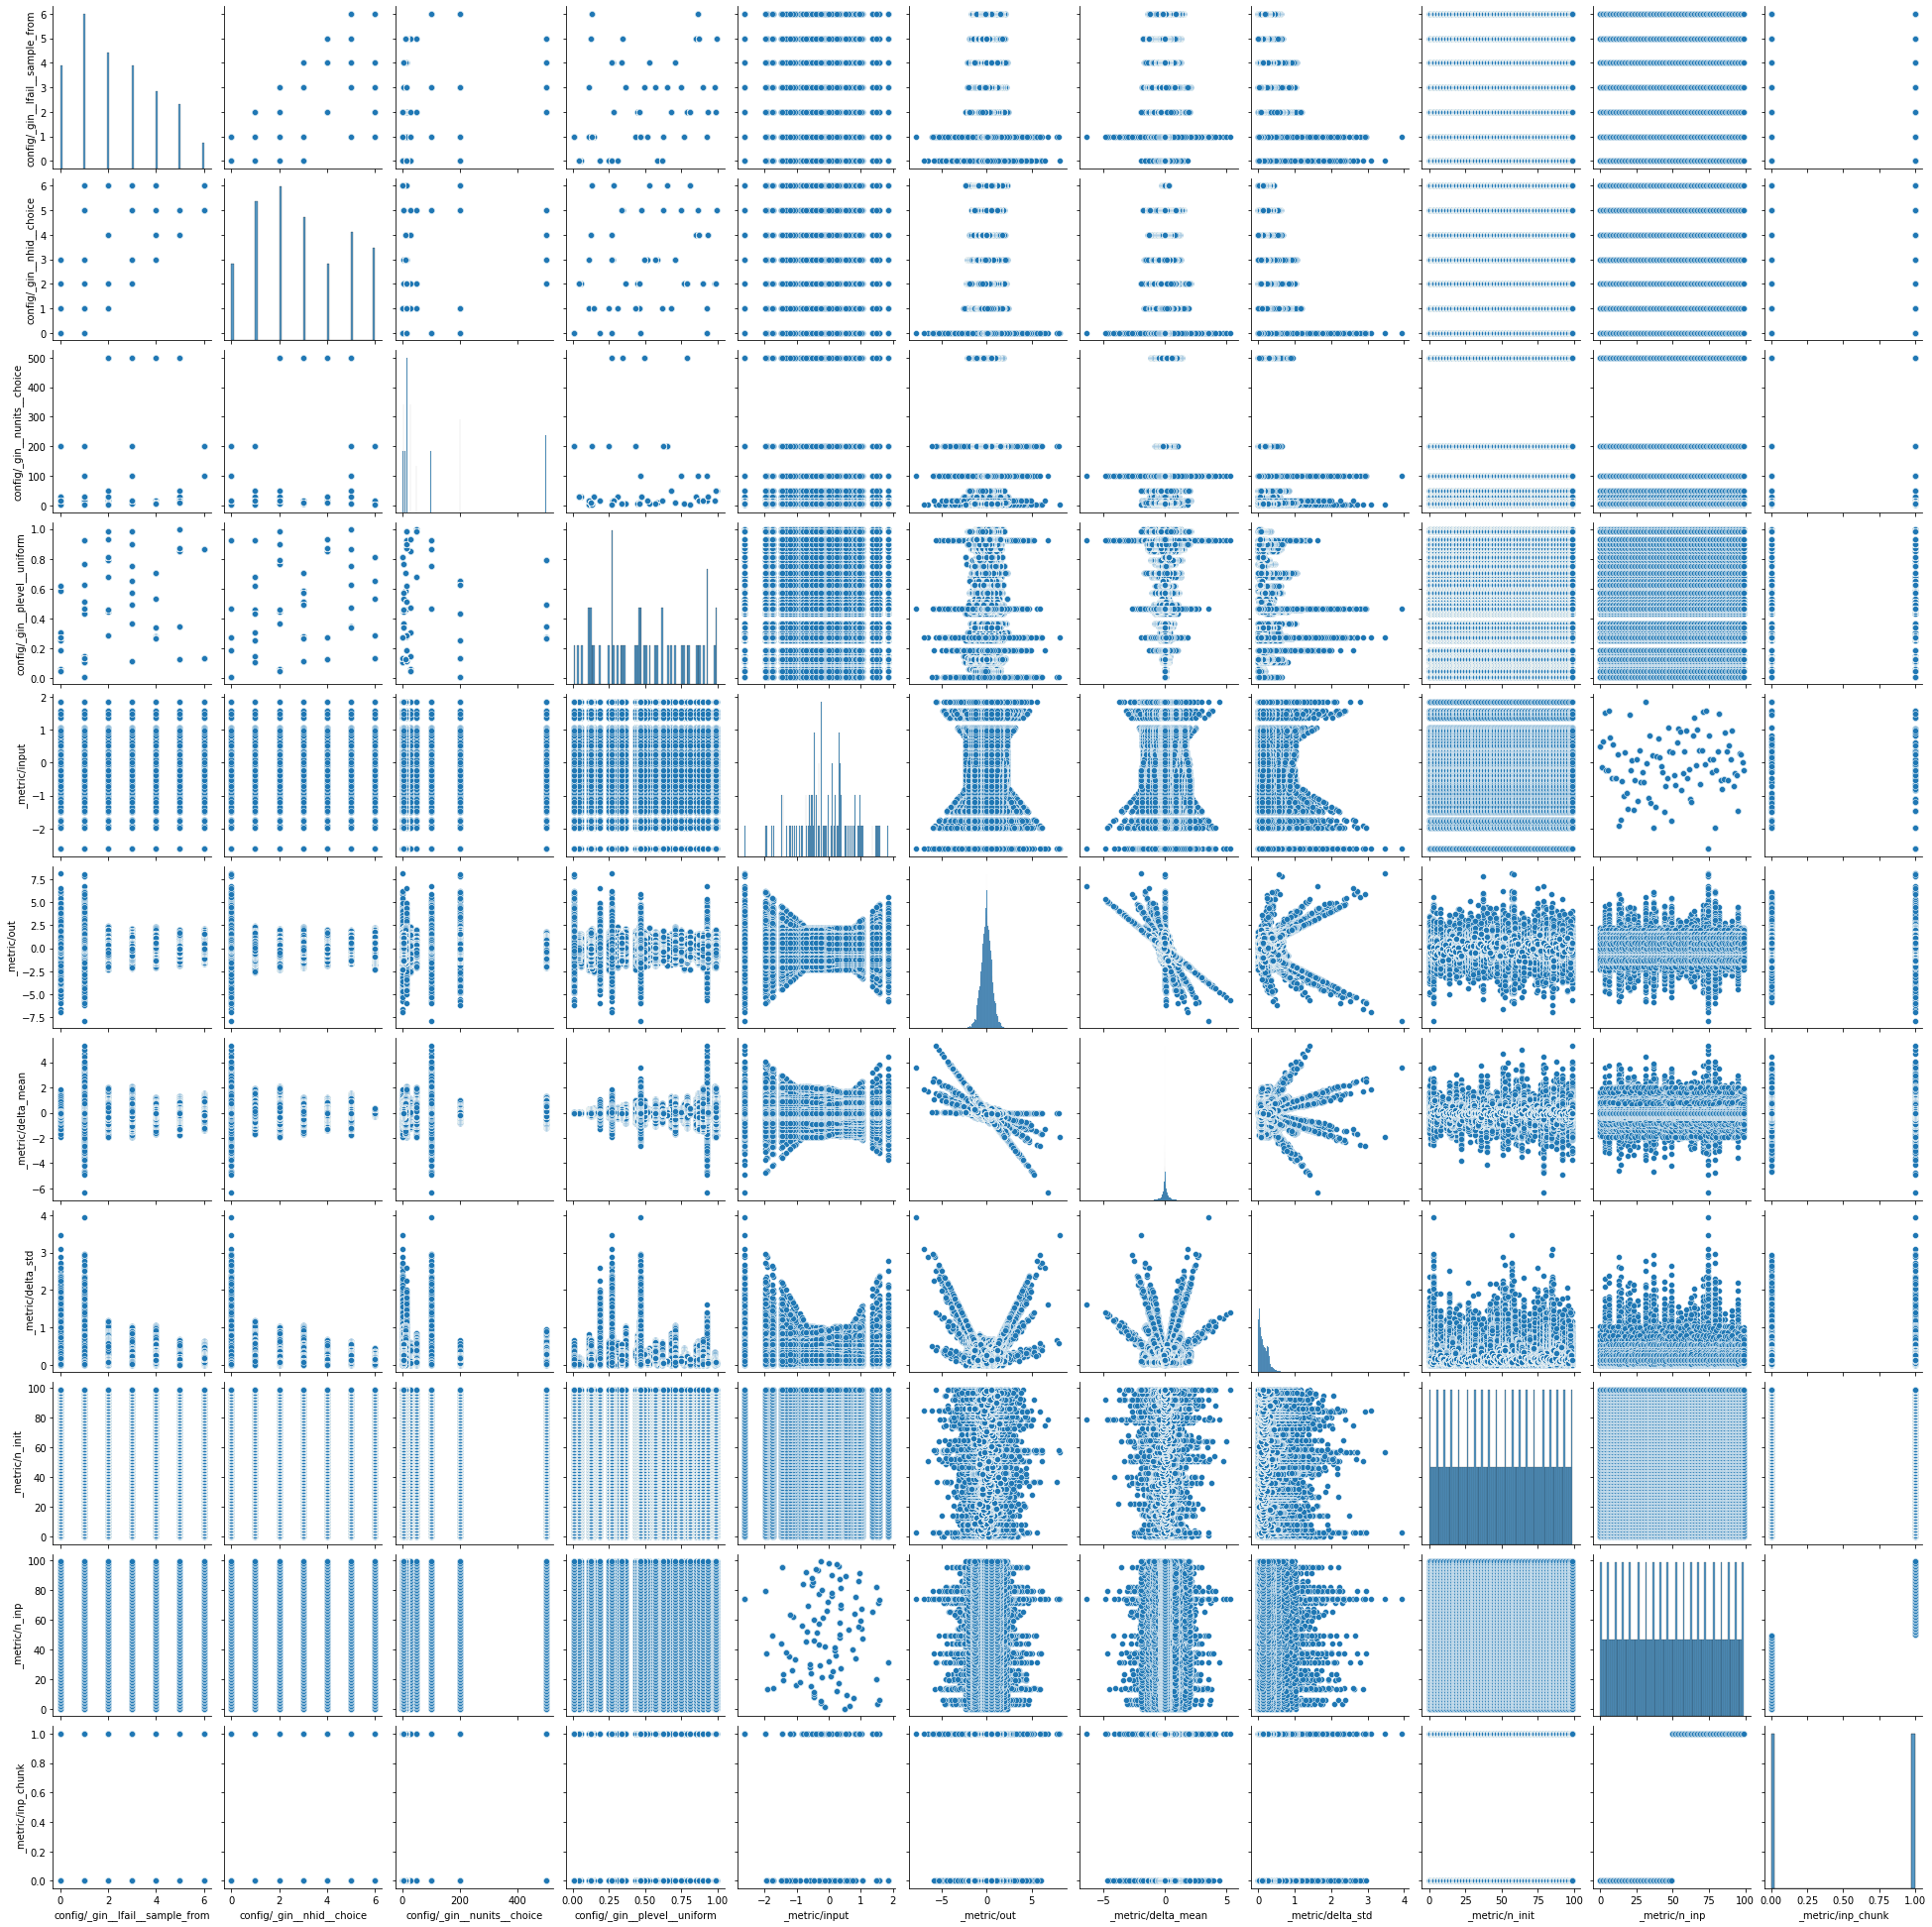

In [46]:
sns.pairplot(df_all[config_columns + metric_columns])

In [ ]:
sns.pairplot(df_all, hue='_metric/delta_std', height=2.5);


In [6]:
analysis.dataframe().columns

Index(['time_this_iter_s', 'done', 'timesteps_total', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', '_metric/input', '_metric/out', '_metric/delta_mean',
       '_metric/delta_std', '_metric/n_init', '_metric/n_inp',
       '_metric/inp_chunk', 'perf/cpu_util_percent', 'perf/ram_util_percent',
       'config/_gin__lfail__sample_from', 'config/_gin__nhid__choice',
       'config/_gin__nunits__choice', 'config/_gin__plevel__uniform',
       'config/config_gin', 'config/log_sys_usage', 'logdir'],
      dtype='object')

In [48]:
len(df_all)

500000

In [62]:
df_all

,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,...,_metric/n_inp,_metric/inp_chunk,perf/cpu_util_percent,perf/ram_util_percent,config/_gin__lfail__sample_from,config/_gin__nhid__choice,config/_gin__nunits__choice,config/_gin__plevel__uniform,config/config_gin,config/log_sys_usage
0,3.680519,False,NaN,NaN,1,f0fcd07d70ba4029bcc8898b7c80948a,2020-11-14_06-35-34,1605332134,3.680519,30023,...,0,0,40.18,49.02,4,3,15,0.276214,import fault_tolerance.experiment\nimport faul...,True
1,0.013875,False,NaN,NaN,2,f0fcd07d70ba4029bcc8898b7c80948a,2020-11-14_06-35-34,1605332134,3.694394,30023,...,1,0,NaN,NaN,4,3,15,0.276214,import fault_tolerance.experiment\nimport faul...,True
2,0.009052,False,NaN,NaN,3,f0fcd07d70ba4029bcc8898b7c80948a,2020-11-14_06-35-34,1605332134,3.703446,30023,...,2,0,NaN,NaN,4,3,15,0.276214,import fault_tolerance.experiment\nimport faul...,True
3,0.011211,False,NaN,NaN,4,f0fcd07d70ba4029bcc8898b7c80948a,2020-11-14_06-35-34,1605332134,3.714657,30023,...,3,0,NaN,NaN,4,3,15,0.276214,import fault_tolerance.experiment\nimport faul...,True
4,0.010166,False,NaN,NaN,5,f0fcd07d70ba4029bcc8898b7c80948a,2020-11-14_06-35-34,1605332134,3.724823,30023,...,4,0,NaN,NaN,4,3,15,0.276214,import fault_tolerance.experiment\nimport faul...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.008723,False,NaN,NaN,9996,cfafd82ba26a475497ee1bc313c7bd3a,2020-11-14_05-11-40,1605327100,858.026549,13797,...,95,1,NaN,NaN,4,5,5,0.338217,import fault_tolerance.experiment\nimport faul...,True
9996,0.007828,False,NaN,NaN,9997,cfafd82ba26a475497ee1bc313c7bd3a,2020-11-14_05-11-40,1605327100,858.034376,13797,...,96,1,NaN,NaN,4,5,5,0.338217,import fault_tolerance.experiment\nimport faul...,True
9997,0.010814,False,NaN,NaN,9998,cfafd82ba26a475497ee1bc313c7bd3a,2020-11-14_05-11-40,1605327100,858.045191,13797,...,97,1,NaN,NaN,4,5,5,0.338217,import fault_tolerance.experiment\nimport faul...,True
9998,0.008682,False,NaN,NaN,9999,cfafd82ba26a475497ee1bc313c7bd3a,2020-11-14_05-11-40,1605327100,858.053873,13797,...,98,1,NaN,NaN,4,5,5,0.338217,import fault_tolerance.experiment\nimport faul...,True


<AxesSubplot:xlabel='config/_gin__nunits__choice', ylabel='_metric/delta_std'>

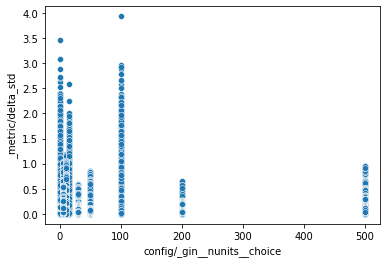

In [65]:
sns.scatterplot(x='config/_gin__nunits__choice', y='_metric/delta_std', data=df_all)

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='config/_gin__nunits__choice'>

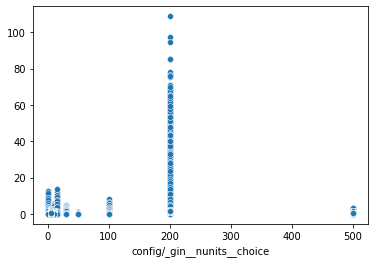

In [68]:
sns.scatterplot(df_all['config/_gin__nunits__choice'], y=df_all['_metric/delta_std'] / df_all['config/_gin__plevel__uniform'])

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
74                                  0                          0   
174                                 0                          0   
274                                 0                          0   
374                                 0                          0   
474                                 0                          0   
...                               ...                        ...   
9574                                0                          0   
9674                                0                          0   
9774                                0                          0   
9874                                0                          0   
9974                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
74                              1                      0.270150  
174                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



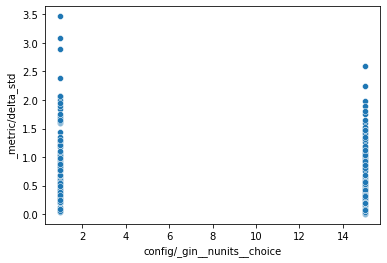

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
79                                  0                          0   
179                                 0                          0   
279                                 0                          0   
379                                 0                          0   
479                                 0                          0   
...                               ...                        ...   
9579                                0                          0   
9679                                0                          0   
9779                                0                          0   
9879                                0                          0   
9979                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
79                              1                      0.270150  
179                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



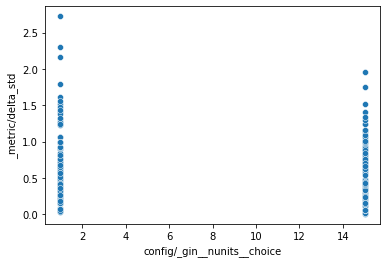

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
37                                  0                          0   
137                                 0                          0   
237                                 0                          0   
337                                 0                          0   
437                                 0                          0   
...                               ...                        ...   
9537                                0                          0   
9637                                0                          0   
9737                                0                          0   
9837                                0                          0   
9937                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
37                              1                      0.270150  
137                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



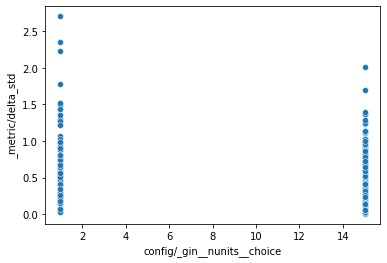

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
13                                  0                          0   
113                                 0                          0   
213                                 0                          0   
313                                 0                          0   
413                                 0                          0   
...                               ...                        ...   
9513                                0                          0   
9613                                0                          0   
9713                                0                          0   
9813                                0                          0   
9913                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
13                              1                      0.270150  
113                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



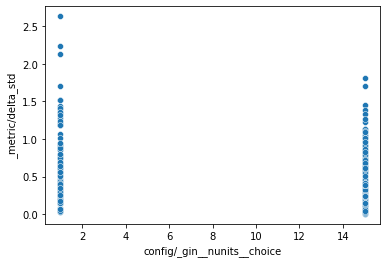

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
49                                  0                          0   
149                                 0                          0   
249                                 0                          0   
349                                 0                          0   
449                                 0                          0   
...                               ...                        ...   
9549                                0                          0   
9649                                0                          0   
9749                                0                          0   
9849                                0                          0   
9949                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
49                              1                      0.270150  
149                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



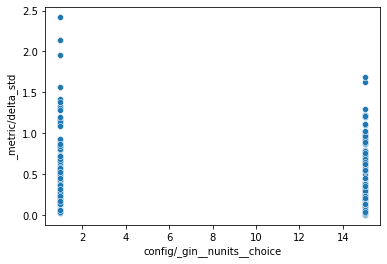

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
14                                  0                          0   
114                                 0                          0   
214                                 0                          0   
314                                 0                          0   
414                                 0                          0   
...                               ...                        ...   
9514                                0                          0   
9614                                0                          0   
9714                                0                          0   
9814                                0                          0   
9914                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
14                              1                      0.270150  
114                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



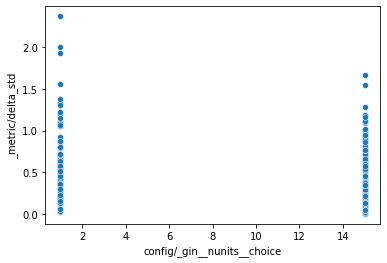

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
44                                  0                          0   
144                                 0                          0   
244                                 0                          0   
344                                 0                          0   
444                                 0                          0   
...                               ...                        ...   
9544                                0                          0   
9644                                0                          0   
9744                                0                          0   
9844                                0                          0   
9944                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
44                              1                      0.270150  
144                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



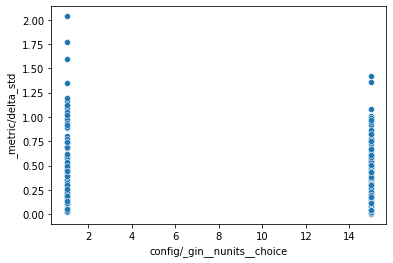

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
95                                  0                          0   
195                                 0                          0   
295                                 0                          0   
395                                 0                          0   
495                                 0                          0   
...                               ...                        ...   
9595                                0                          0   
9695                                0                          0   
9795                                0                          0   
9895                                0                          0   
9995                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
95                              1                      0.270150  
195                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



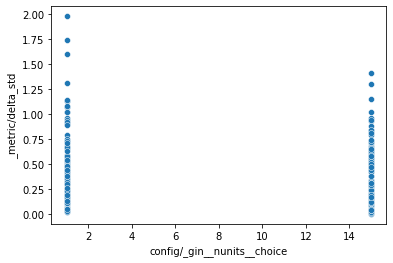

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
23                                  0                          0   
123                                 0                          0   
223                                 0                          0   
323                                 0                          0   
423                                 0                          0   
...                               ...                        ...   
9523                                0                          0   
9623                                0                          0   
9723                                0                          0   
9823                                0                          0   
9923                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
23                              1                      0.270150  
123                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



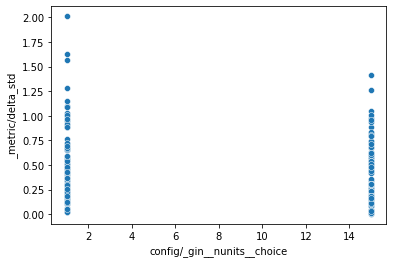

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
19                                  0                          0   
119                                 0                          0   
219                                 0                          0   
319                                 0                          0   
419                                 0                          0   
...                               ...                        ...   
9519                                0                          0   
9619                                0                          0   
9719                                0                          0   
9819                                0                          0   
9919                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
19                              1                      0.270150  
119                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



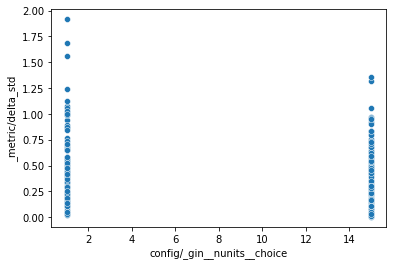

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
38                                  0                          0   
138                                 0                          0   
238                                 0                          0   
338                                 0                          0   
438                                 0                          0   
...                               ...                        ...   
9538                                0                          0   
9638                                0                          0   
9738                                0                          0   
9838                                0                          0   
9938                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
38                              1                      0.270150  
138                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



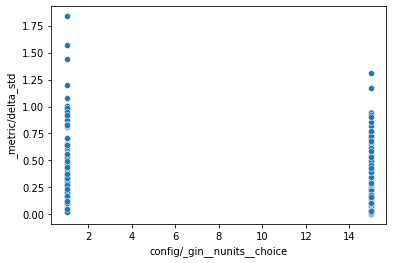

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
35                                  0                          0   
135                                 0                          0   
235                                 0                          0   
335                                 0                          0   
435                                 0                          0   
...                               ...                        ...   
9535                                0                          0   
9635                                0                          0   
9735                                0                          0   
9835                                0                          0   
9935                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
35                              1                      0.270150  
135                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



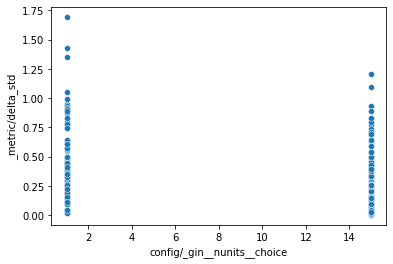

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
63                                  0                          0   
163                                 0                          0   
263                                 0                          0   
363                                 0                          0   
463                                 0                          0   
...                               ...                        ...   
9563                                0                          0   
9663                                0                          0   
9763                                0                          0   
9863                                0                          0   
9963                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
63                              1                      0.270150  
163                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



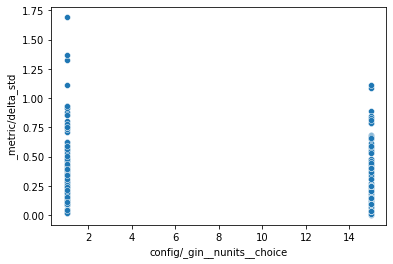

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
26                                  0                          0   
126                                 0                          0   
226                                 0                          0   
326                                 0                          0   
426                                 0                          0   
...                               ...                        ...   
9526                                0                          0   
9626                                0                          0   
9726                                0                          0   
9826                                0                          0   
9926                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
26                              1                      0.270150  
126                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



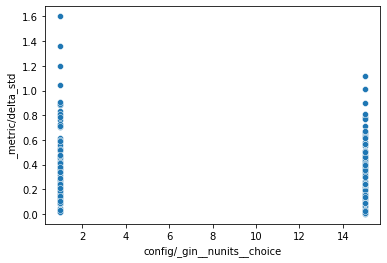

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
62                                  0                          0   
162                                 0                          0   
262                                 0                          0   
362                                 0                          0   
462                                 0                          0   
...                               ...                        ...   
9562                                0                          0   
9662                                0                          0   
9762                                0                          0   
9862                                0                          0   
9962                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
62                              1                      0.270150  
162                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



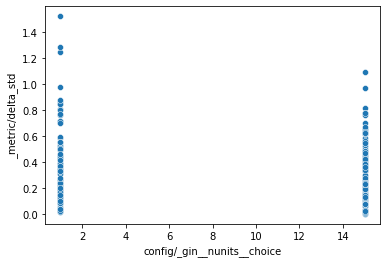

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
33                                  0                          0   
133                                 0                          0   
233                                 0                          0   
333                                 0                          0   
433                                 0                          0   
...                               ...                        ...   
9533                                0                          0   
9633                                0                          0   
9733                                0                          0   
9833                                0                          0   
9933                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
33                              1                      0.270150  
133                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



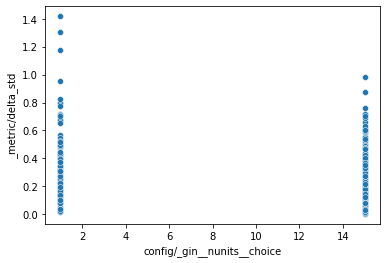

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
16                                  0                          0   
116                                 0                          0   
216                                 0                          0   
316                                 0                          0   
416                                 0                          0   
...                               ...                        ...   
9516                                0                          0   
9616                                0                          0   
9716                                0                          0   
9816                                0                          0   
9916                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
16                              1                      0.270150  
116                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



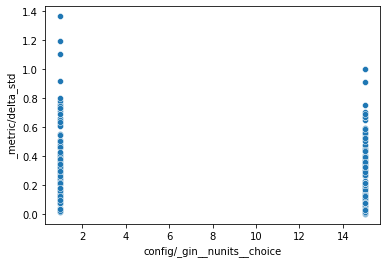

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
18                                  0                          0   
118                                 0                          0   
218                                 0                          0   
318                                 0                          0   
418                                 0                          0   
...                               ...                        ...   
9518                                0                          0   
9618                                0                          0   
9718                                0                          0   
9818                                0                          0   
9918                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
18                              1                      0.270150  
118                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



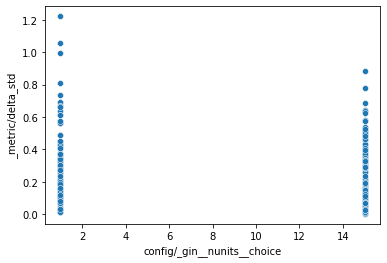

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
56                                  0                          0   
156                                 0                          0   
256                                 0                          0   
356                                 0                          0   
456                                 0                          0   
...                               ...                        ...   
9556                                0                          0   
9656                                0                          0   
9756                                0                          0   
9856                                0                          0   
9956                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
56                              1                      0.270150  
156                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



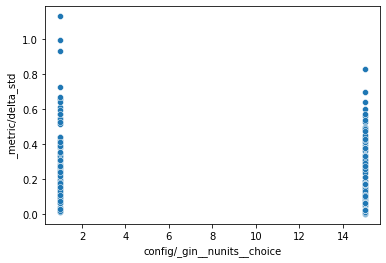

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
84                                  0                          0   
184                                 0                          0   
284                                 0                          0   
384                                 0                          0   
484                                 0                          0   
...                               ...                        ...   
9584                                0                          0   
9684                                0                          0   
9784                                0                          0   
9884                                0                          0   
9984                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
84                              1                      0.270150  
184                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



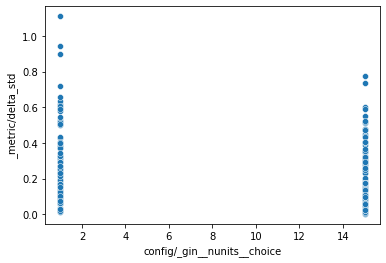

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
45                                  0                          0   
145                                 0                          0   
245                                 0                          0   
345                                 0                          0   
445                                 0                          0   
...                               ...                        ...   
9545                                0                          0   
9645                                0                          0   
9745                                0                          0   
9845                                0                          0   
9945                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
45                              1                      0.270150  
145                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



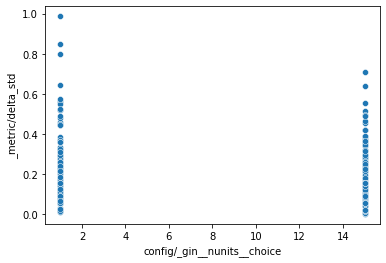

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
92                                  0                          0   
192                                 0                          0   
292                                 0                          0   
392                                 0                          0   
492                                 0                          0   
...                               ...                        ...   
9592                                0                          0   
9692                                0                          0   
9792                                0                          0   
9892                                0                          0   
9992                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
92                              1                      0.270150  
192                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



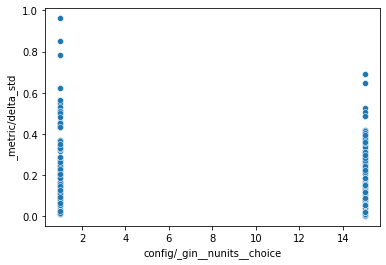

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
52                                  0                          0   
152                                 0                          0   
252                                 0                          0   
352                                 0                          0   
452                                 0                          0   
...                               ...                        ...   
9552                                0                          0   
9652                                0                          0   
9752                                0                          0   
9852                                0                          0   
9952                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
52                              1                      0.270150  
152                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



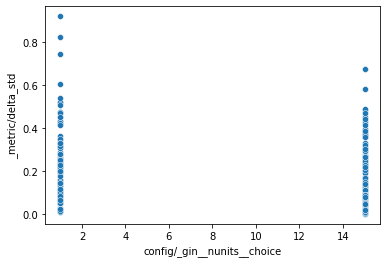

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
69                                  0                          0   
169                                 0                          0   
269                                 0                          0   
369                                 0                          0   
469                                 0                          0   
...                               ...                        ...   
9569                                0                          0   
9669                                0                          0   
9769                                0                          0   
9869                                0                          0   
9969                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
69                              1                      0.270150  
169                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



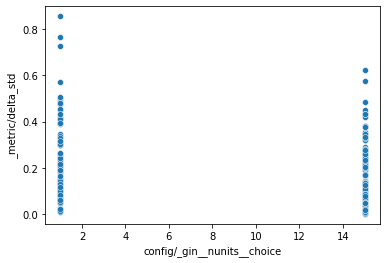

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
30                                  0                          0   
130                                 0                          0   
230                                 0                          0   
330                                 0                          0   
430                                 0                          0   
...                               ...                        ...   
9530                                0                          0   
9630                                0                          0   
9730                                0                          0   
9830                                0                          0   
9930                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
30                              1                      0.270150  
130                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



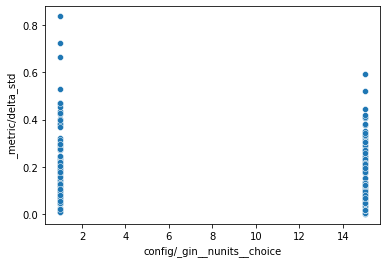

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
28                                  0                          0   
128                                 0                          0   
228                                 0                          0   
328                                 0                          0   
428                                 0                          0   
...                               ...                        ...   
9528                                0                          0   
9628                                0                          0   
9728                                0                          0   
9828                                0                          0   
9928                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
28                              1                      0.270150  
128                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



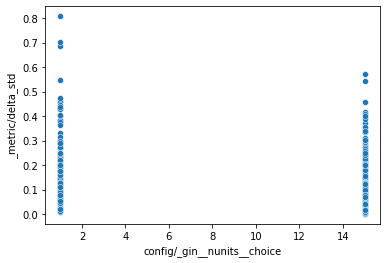

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
15                                  0                          0   
115                                 0                          0   
215                                 0                          0   
315                                 0                          0   
415                                 0                          0   
...                               ...                        ...   
9515                                0                          0   
9615                                0                          0   
9715                                0                          0   
9815                                0                          0   
9915                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
15                              1                      0.270150  
115                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



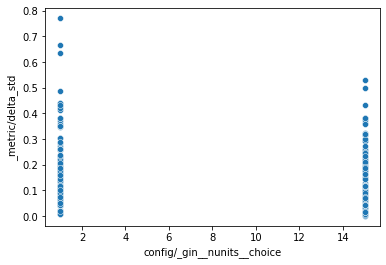

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
24                                  0                          0   
124                                 0                          0   
224                                 0                          0   
324                                 0                          0   
424                                 0                          0   
...                               ...                        ...   
9524                                0                          0   
9624                                0                          0   
9724                                0                          0   
9824                                0                          0   
9924                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
24                              1                      0.270150  
124                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



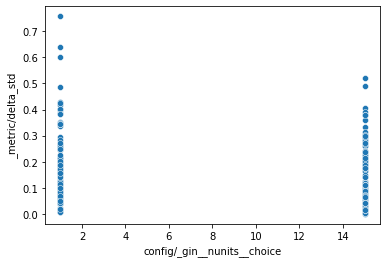

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
88                                  0                          0   
188                                 0                          0   
288                                 0                          0   
388                                 0                          0   
488                                 0                          0   
...                               ...                        ...   
9588                                0                          0   
9688                                0                          0   
9788                                0                          0   
9888                                0                          0   
9988                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
88                              1                      0.270150  
188                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



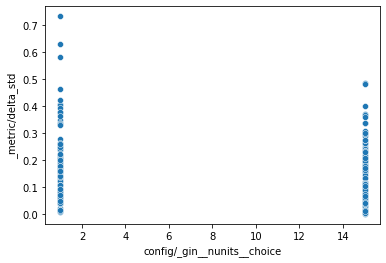

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
83                                  0                          0   
183                                 0                          0   
283                                 0                          0   
383                                 0                          0   
483                                 0                          0   
...                               ...                        ...   
9583                                0                          0   
9683                                0                          0   
9783                                0                          0   
9883                                0                          0   
9983                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
83                              1                      0.270150  
183                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



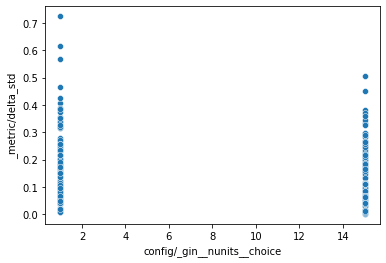

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
85                                  0                          0   
185                                 0                          0   
285                                 0                          0   
385                                 0                          0   
485                                 0                          0   
...                               ...                        ...   
9585                                0                          0   
9685                                0                          0   
9785                                0                          0   
9885                                0                          0   
9985                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
85                              1                      0.270150  
185                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



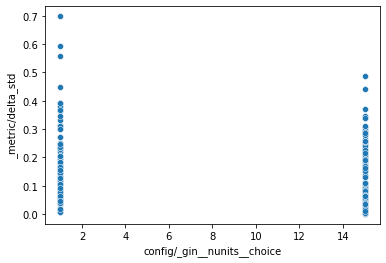

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
60                                  0                          0   
160                                 0                          0   
260                                 0                          0   
360                                 0                          0   
460                                 0                          0   
...                               ...                        ...   
9560                                0                          0   
9660                                0                          0   
9760                                0                          0   
9860                                0                          0   
9960                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
60                              1                      0.270150  
160                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



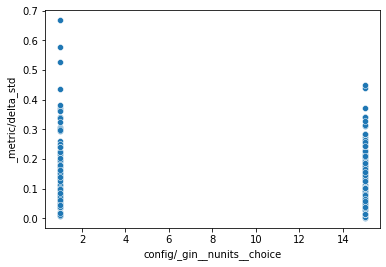

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
8                                   0                          0   
108                                 0                          0   
208                                 0                          0   
308                                 0                          0   
408                                 0                          0   
...                               ...                        ...   
9508                                0                          0   
9608                                0                          0   
9708                                0                          0   
9808                                0                          0   
9908                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
8                               1                      0.270150  
108                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



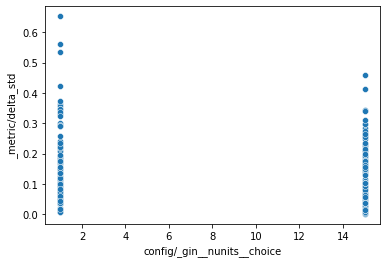

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
11                                  0                          0   
111                                 0                          0   
211                                 0                          0   
311                                 0                          0   
411                                 0                          0   
...                               ...                        ...   
9511                                0                          0   
9611                                0                          0   
9711                                0                          0   
9811                                0                          0   
9911                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
11                              1                      0.270150  
111                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



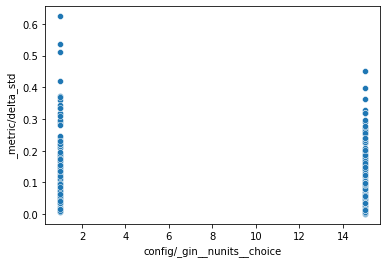

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
10                                  0                          0   
110                                 0                          0   
210                                 0                          0   
310                                 0                          0   
410                                 0                          0   
...                               ...                        ...   
9510                                0                          0   
9610                                0                          0   
9710                                0                          0   
9810                                0                          0   
9910                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
10                              1                      0.270150  
110                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



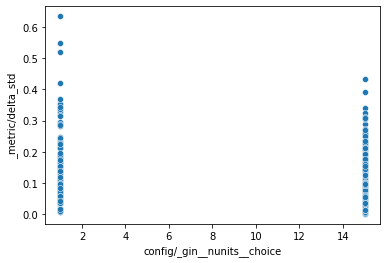

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
46                                  0                          0   
146                                 0                          0   
246                                 0                          0   
346                                 0                          0   
446                                 0                          0   
...                               ...                        ...   
9546                                0                          0   
9646                                0                          0   
9746                                0                          0   
9846                                0                          0   
9946                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
46                              1                      0.270150  
146                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



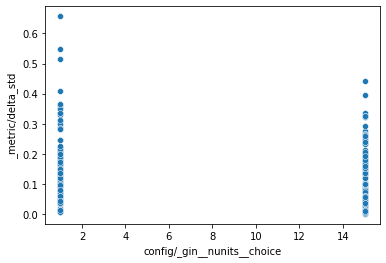

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
94                                  0                          0   
194                                 0                          0   
294                                 0                          0   
394                                 0                          0   
494                                 0                          0   
...                               ...                        ...   
9594                                0                          0   
9694                                0                          0   
9794                                0                          0   
9894                                0                          0   
9994                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
94                              1                      0.270150  
194                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



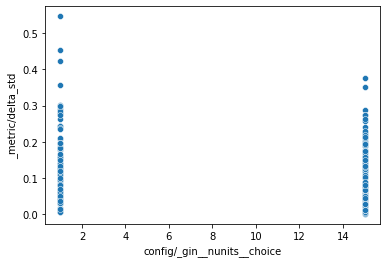

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
51                                  0                          0   
151                                 0                          0   
251                                 0                          0   
351                                 0                          0   
451                                 0                          0   
...                               ...                        ...   
9551                                0                          0   
9651                                0                          0   
9751                                0                          0   
9851                                0                          0   
9951                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
51                              1                      0.270150  
151                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



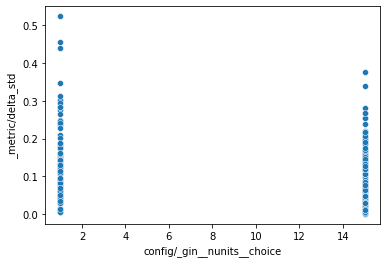

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
93                                  0                          0   
193                                 0                          0   
293                                 0                          0   
393                                 0                          0   
493                                 0                          0   
...                               ...                        ...   
9593                                0                          0   
9693                                0                          0   
9793                                0                          0   
9893                                0                          0   
9993                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
93                              1                      0.270150  
193                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



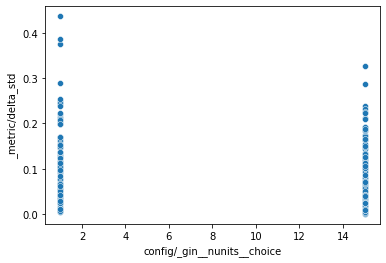

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
57                                  0                          0   
157                                 0                          0   
257                                 0                          0   
357                                 0                          0   
457                                 0                          0   
...                               ...                        ...   
9557                                0                          0   
9657                                0                          0   
9757                                0                          0   
9857                                0                          0   
9957                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
57                              1                      0.270150  
157                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



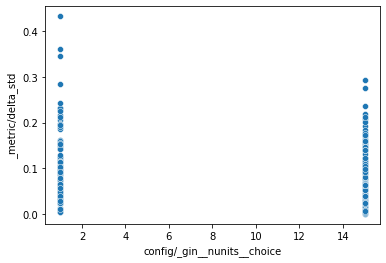

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
43                                  0                          0   
143                                 0                          0   
243                                 0                          0   
343                                 0                          0   
443                                 0                          0   
...                               ...                        ...   
9543                                0                          0   
9643                                0                          0   
9743                                0                          0   
9843                                0                          0   
9943                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
43                              1                      0.270150  
143                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



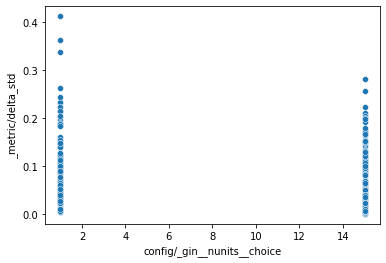

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
77                                  0                          0   
177                                 0                          0   
277                                 0                          0   
377                                 0                          0   
477                                 0                          0   
...                               ...                        ...   
9577                                0                          0   
9677                                0                          0   
9777                                0                          0   
9877                                0                          0   
9977                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
77                              1                      0.270150  
177                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



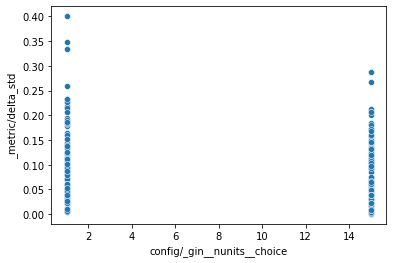

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
29                                  0                          0   
129                                 0                          0   
229                                 0                          0   
329                                 0                          0   
429                                 0                          0   
...                               ...                        ...   
9529                                0                          0   
9629                                0                          0   
9729                                0                          0   
9829                                0                          0   
9929                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
29                              1                      0.270150  
129                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



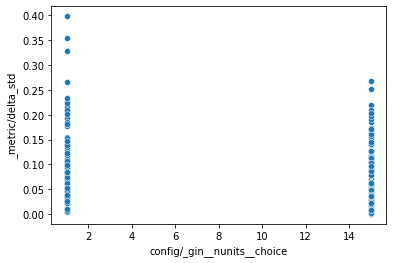

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
99                                  0                          0   
199                                 0                          0   
299                                 0                          0   
399                                 0                          0   
499                                 0                          0   
...                               ...                        ...   
9599                                0                          0   
9699                                0                          0   
9799                                0                          0   
9899                                0                          0   
9999                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
99                              1                      0.270150  
199                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



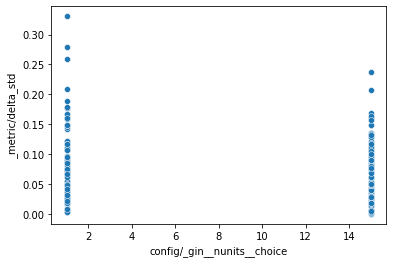

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
4                                   0                          0   
104                                 0                          0   
204                                 0                          0   
304                                 0                          0   
404                                 0                          0   
...                               ...                        ...   
9504                                0                          0   
9604                                0                          0   
9704                                0                          0   
9804                                0                          0   
9904                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
4                               1                      0.270150  
104                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



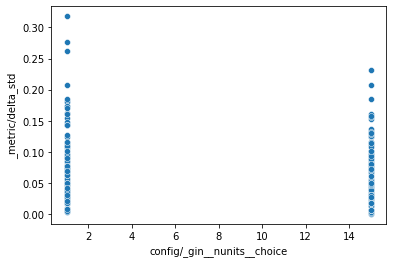

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
5                                   0                          0   
105                                 0                          0   
205                                 0                          0   
305                                 0                          0   
405                                 0                          0   
...                               ...                        ...   
9505                                0                          0   
9605                                0                          0   
9705                                0                          0   
9805                                0                          0   
9905                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
5                               1                      0.270150  
105                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



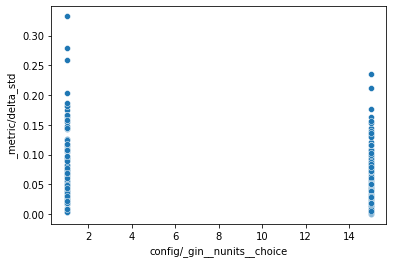

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
21                                  0                          0   
121                                 0                          0   
221                                 0                          0   
321                                 0                          0   
421                                 0                          0   
...                               ...                        ...   
9521                                0                          0   
9621                                0                          0   
9721                                0                          0   
9821                                0                          0   
9921                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
21                              1                      0.270150  
121                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



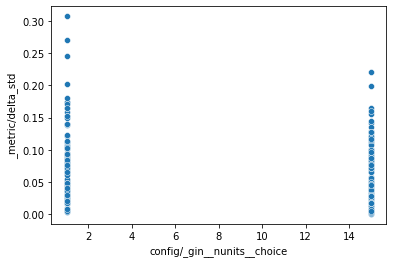

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
80                                  0                          0   
180                                 0                          0   
280                                 0                          0   
380                                 0                          0   
480                                 0                          0   
...                               ...                        ...   
9580                                0                          0   
9680                                0                          0   
9780                                0                          0   
9880                                0                          0   
9980                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
80                              1                      0.270150  
180                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



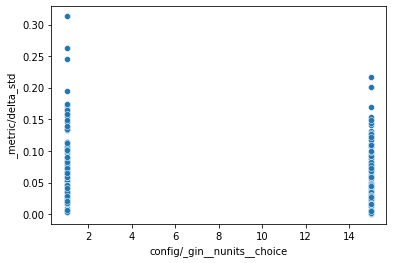

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
61                                  0                          0   
161                                 0                          0   
261                                 0                          0   
361                                 0                          0   
461                                 0                          0   
...                               ...                        ...   
9561                                0                          0   
9661                                0                          0   
9761                                0                          0   
9861                                0                          0   
9961                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
61                              1                      0.270150  
161                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



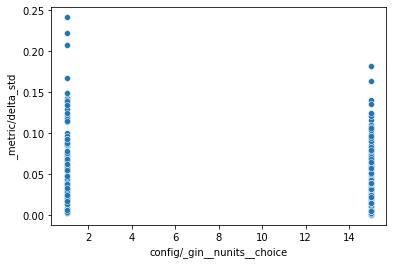

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
1                                   0                          0   
101                                 0                          0   
201                                 0                          0   
301                                 0                          0   
401                                 0                          0   
...                               ...                        ...   
9501                                0                          0   
9601                                0                          0   
9701                                0                          0   
9801                                0                          0   
9901                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
1                               1                      0.270150  
101                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



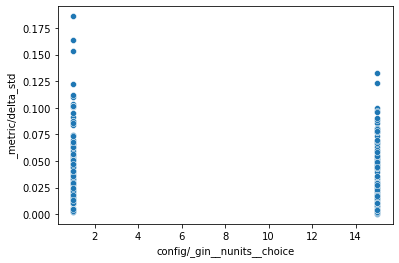

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
42                                  0                          0   
142                                 0                          0   
242                                 0                          0   
342                                 0                          0   
442                                 0                          0   
...                               ...                        ...   
9542                                0                          0   
9642                                0                          0   
9742                                0                          0   
9842                                0                          0   
9942                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
42                              1                      0.270150  
142                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



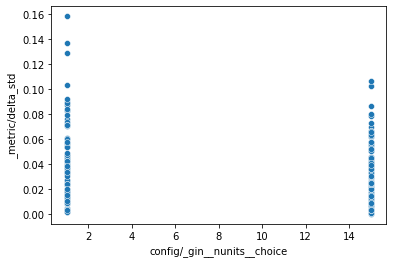

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
66                                  0                          0   
166                                 0                          0   
266                                 0                          0   
366                                 0                          0   
466                                 0                          0   
...                               ...                        ...   
9566                                0                          0   
9666                                0                          0   
9766                                0                          0   
9866                                0                          0   
9966                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
66                              1                      0.270150  
166                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



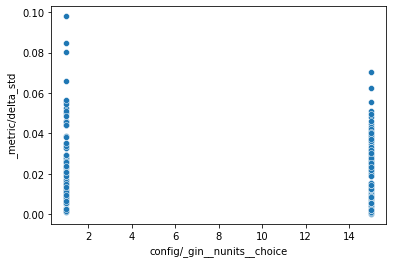

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
72                                  0                          0   
172                                 0                          0   
272                                 0                          0   
372                                 0                          0   
472                                 0                          0   
...                               ...                        ...   
9572                                0                          0   
9672                                0                          0   
9772                                0                          0   
9872                                0                          0   
9972                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
72                              1                      0.270150  
172                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



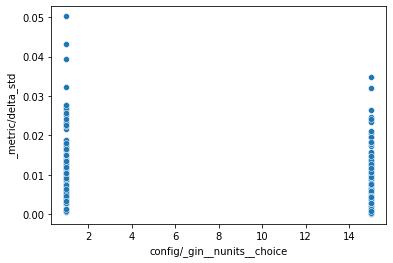

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
32                                  0                          0   
132                                 0                          0   
232                                 0                          0   
332                                 0                          0   
432                                 0                          0   
...                               ...                        ...   
9532                                0                          0   
9632                                0                          0   
9732                                0                          0   
9832                                0                          0   
9932                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
32                              1                      0.270150  
132                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



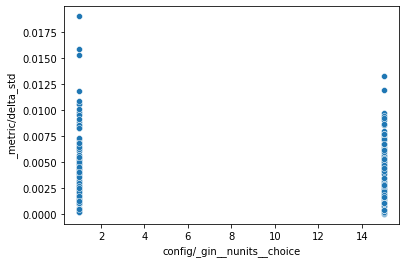

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
98                                  0                          0   
198                                 0                          0   
298                                 0                          0   
398                                 0                          0   
498                                 0                          0   
...                               ...                        ...   
9598                                0                          0   
9698                                0                          0   
9798                                0                          0   
9898                                0                          0   
9998                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
98                              1                      0.270150  
198                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



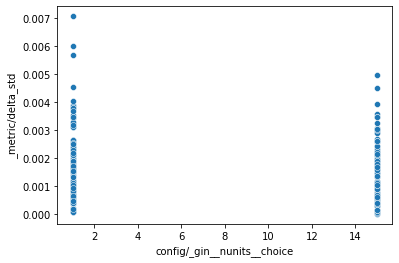

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
22                                  0                          0   
122                                 0                          0   
222                                 0                          0   
322                                 0                          0   
422                                 0                          0   
...                               ...                        ...   
9522                                0                          0   
9622                                0                          0   
9722                                0                          0   
9822                                0                          0   
9922                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
22                              1                      0.270150  
122                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



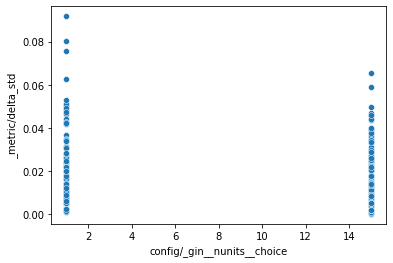

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
76                                  0                          0   
176                                 0                          0   
276                                 0                          0   
376                                 0                          0   
476                                 0                          0   
...                               ...                        ...   
9576                                0                          0   
9676                                0                          0   
9776                                0                          0   
9876                                0                          0   
9976                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
76                              1                      0.270150  
176                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



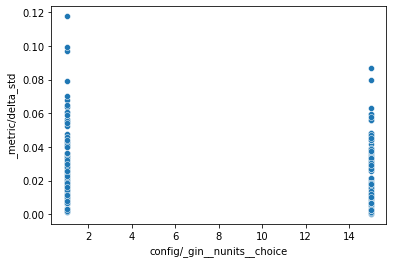

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
78                                  0                          0   
178                                 0                          0   
278                                 0                          0   
378                                 0                          0   
478                                 0                          0   
...                               ...                        ...   
9578                                0                          0   
9678                                0                          0   
9778                                0                          0   
9878                                0                          0   
9978                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
78                              1                      0.270150  
178                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



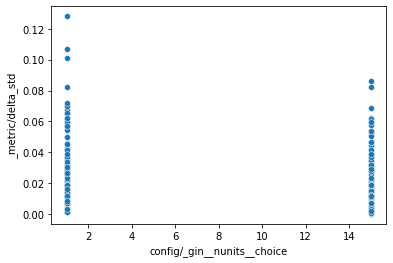

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
90                                  0                          0   
190                                 0                          0   
290                                 0                          0   
390                                 0                          0   
490                                 0                          0   
...                               ...                        ...   
9590                                0                          0   
9690                                0                          0   
9790                                0                          0   
9890                                0                          0   
9990                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
90                              1                      0.270150  
190                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



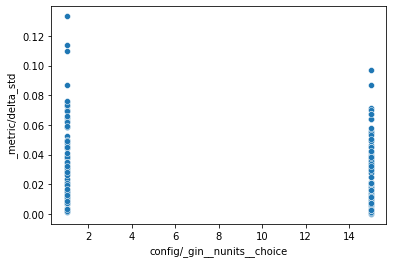

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
25                                  0                          0   
125                                 0                          0   
225                                 0                          0   
325                                 0                          0   
425                                 0                          0   
...                               ...                        ...   
9525                                0                          0   
9625                                0                          0   
9725                                0                          0   
9825                                0                          0   
9925                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
25                              1                      0.270150  
125                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



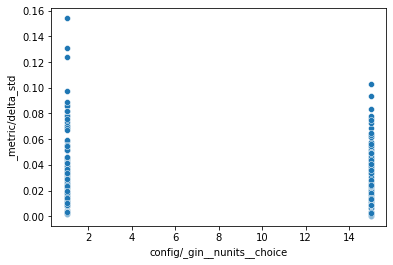

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
41                                  0                          0   
141                                 0                          0   
241                                 0                          0   
341                                 0                          0   
441                                 0                          0   
...                               ...                        ...   
9541                                0                          0   
9641                                0                          0   
9741                                0                          0   
9841                                0                          0   
9941                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
41                              1                      0.270150  
141                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



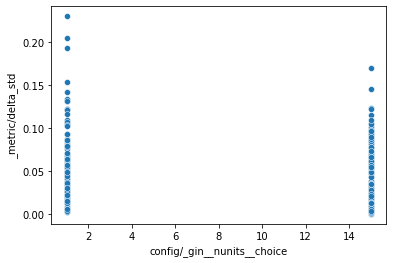

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
39                                  0                          0   
139                                 0                          0   
239                                 0                          0   
339                                 0                          0   
439                                 0                          0   
...                               ...                        ...   
9539                                0                          0   
9639                                0                          0   
9739                                0                          0   
9839                                0                          0   
9939                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
39                              1                      0.270150  
139                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



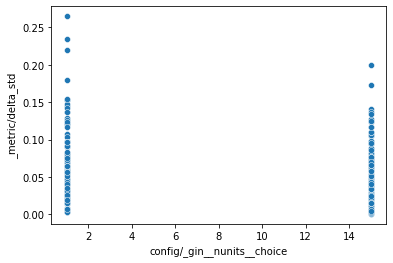

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
36                                  0                          0   
136                                 0                          0   
236                                 0                          0   
336                                 0                          0   
436                                 0                          0   
...                               ...                        ...   
9536                                0                          0   
9636                                0                          0   
9736                                0                          0   
9836                                0                          0   
9936                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
36                              1                      0.270150  
136                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



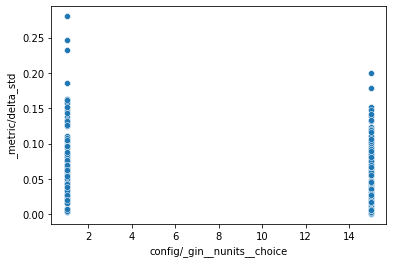

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
12                                  0                          0   
112                                 0                          0   
212                                 0                          0   
312                                 0                          0   
412                                 0                          0   
...                               ...                        ...   
9512                                0                          0   
9612                                0                          0   
9712                                0                          0   
9812                                0                          0   
9912                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
12                              1                      0.270150  
112                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



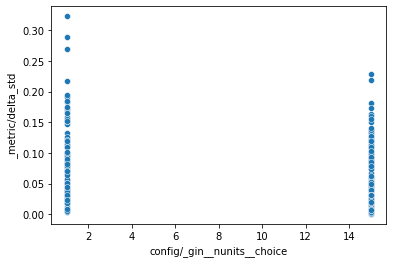

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
97                                  0                          0   
197                                 0                          0   
297                                 0                          0   
397                                 0                          0   
497                                 0                          0   
...                               ...                        ...   
9597                                0                          0   
9697                                0                          0   
9797                                0                          0   
9897                                0                          0   
9997                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
97                              1                      0.270150  
197                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



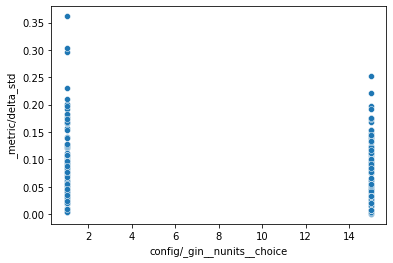

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
96                                  0                          0   
196                                 0                          0   
296                                 0                          0   
396                                 0                          0   
496                                 0                          0   
...                               ...                        ...   
9596                                0                          0   
9696                                0                          0   
9796                                0                          0   
9896                                0                          0   
9996                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
96                              1                      0.270150  
196                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



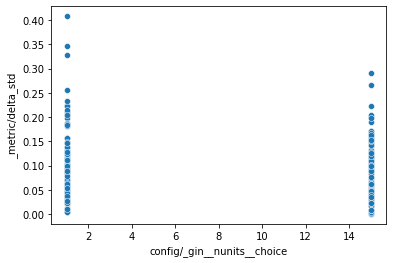

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
17                                  0                          0   
117                                 0                          0   
217                                 0                          0   
317                                 0                          0   
417                                 0                          0   
...                               ...                        ...   
9517                                0                          0   
9617                                0                          0   
9717                                0                          0   
9817                                0                          0   
9917                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
17                              1                      0.270150  
117                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



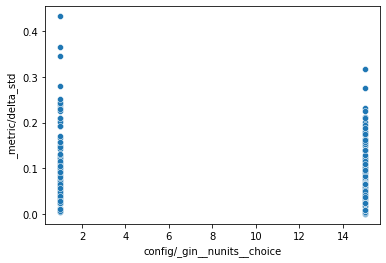

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
50                                  0                          0   
150                                 0                          0   
250                                 0                          0   
350                                 0                          0   
450                                 0                          0   
...                               ...                        ...   
9550                                0                          0   
9650                                0                          0   
9750                                0                          0   
9850                                0                          0   
9950                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
50                              1                      0.270150  
150                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



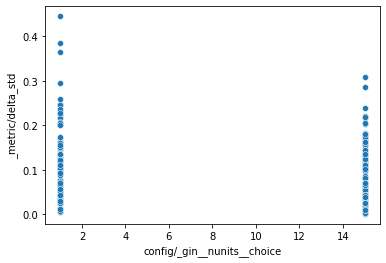

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
87                                  0                          0   
187                                 0                          0   
287                                 0                          0   
387                                 0                          0   
487                                 0                          0   
...                               ...                        ...   
9587                                0                          0   
9687                                0                          0   
9787                                0                          0   
9887                                0                          0   
9987                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
87                              1                      0.270150  
187                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



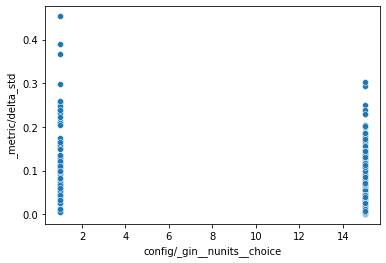

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
58                                  0                          0   
158                                 0                          0   
258                                 0                          0   
358                                 0                          0   
458                                 0                          0   
...                               ...                        ...   
9558                                0                          0   
9658                                0                          0   
9758                                0                          0   
9858                                0                          0   
9958                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
58                              1                      0.270150  
158                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



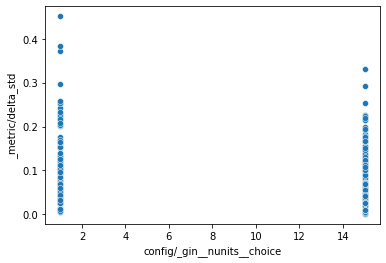

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
48                                  0                          0   
148                                 0                          0   
248                                 0                          0   
348                                 0                          0   
448                                 0                          0   
...                               ...                        ...   
9548                                0                          0   
9648                                0                          0   
9748                                0                          0   
9848                                0                          0   
9948                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
48                              1                      0.270150  
148                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



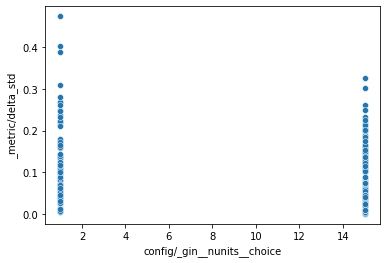

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
81                                  0                          0   
181                                 0                          0   
281                                 0                          0   
381                                 0                          0   
481                                 0                          0   
...                               ...                        ...   
9581                                0                          0   
9681                                0                          0   
9781                                0                          0   
9881                                0                          0   
9981                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
81                              1                      0.270150  
181                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



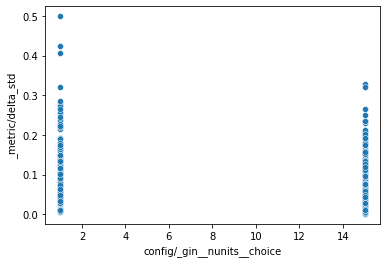

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
70                                  0                          0   
170                                 0                          0   
270                                 0                          0   
370                                 0                          0   
470                                 0                          0   
...                               ...                        ...   
9570                                0                          0   
9670                                0                          0   
9770                                0                          0   
9870                                0                          0   
9970                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
70                              1                      0.270150  
170                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



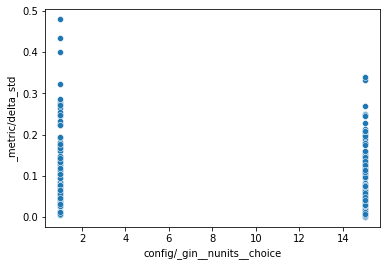

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
68                                  0                          0   
168                                 0                          0   
268                                 0                          0   
368                                 0                          0   
468                                 0                          0   
...                               ...                        ...   
9568                                0                          0   
9668                                0                          0   
9768                                0                          0   
9868                                0                          0   
9968                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
68                              1                      0.270150  
168                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



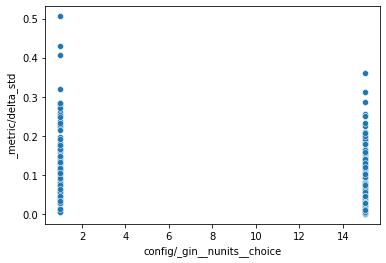

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
27                                  0                          0   
127                                 0                          0   
227                                 0                          0   
327                                 0                          0   
427                                 0                          0   
...                               ...                        ...   
9527                                0                          0   
9627                                0                          0   
9727                                0                          0   
9827                                0                          0   
9927                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
27                              1                      0.270150  
127                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



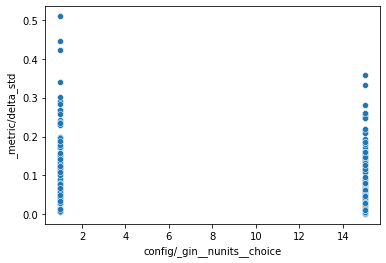

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
0                                   0                          0   
100                                 0                          0   
200                                 0                          0   
300                                 0                          0   
400                                 0                          0   
...                               ...                        ...   
9500                                0                          0   
9600                                0                          0   
9700                                0                          0   
9800                                0                          0   
9900                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
0                               1                      0.270150  
100                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



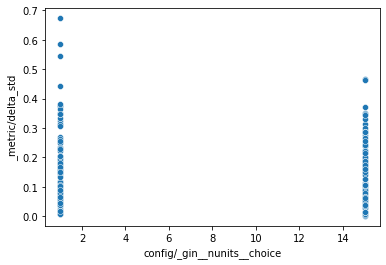

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
89                                  0                          0   
189                                 0                          0   
289                                 0                          0   
389                                 0                          0   
489                                 0                          0   
...                               ...                        ...   
9589                                0                          0   
9689                                0                          0   
9789                                0                          0   
9889                                0                          0   
9989                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
89                              1                      0.270150  
189                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



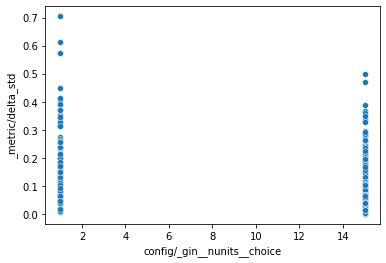

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
9                                   0                          0   
109                                 0                          0   
209                                 0                          0   
309                                 0                          0   
409                                 0                          0   
...                               ...                        ...   
9509                                0                          0   
9609                                0                          0   
9709                                0                          0   
9809                                0                          0   
9909                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
9                               1                      0.270150  
109                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



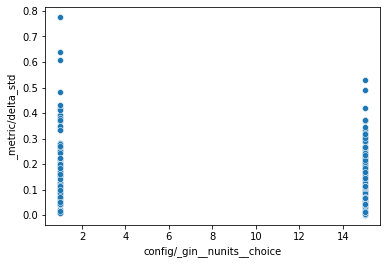

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
53                                  0                          0   
153                                 0                          0   
253                                 0                          0   
353                                 0                          0   
453                                 0                          0   
...                               ...                        ...   
9553                                0                          0   
9653                                0                          0   
9753                                0                          0   
9853                                0                          0   
9953                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
53                              1                      0.270150  
153                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



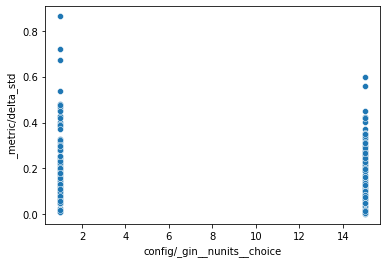

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
2                                   0                          0   
102                                 0                          0   
202                                 0                          0   
302                                 0                          0   
402                                 0                          0   
...                               ...                        ...   
9502                                0                          0   
9602                                0                          0   
9702                                0                          0   
9802                                0                          0   
9902                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
2                               1                      0.270150  
102                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



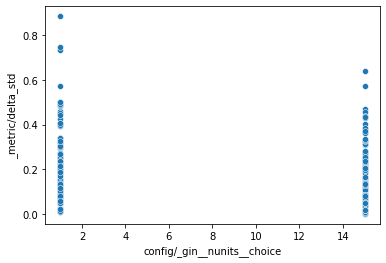

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
40                                  0                          0   
140                                 0                          0   
240                                 0                          0   
340                                 0                          0   
440                                 0                          0   
...                               ...                        ...   
9540                                0                          0   
9640                                0                          0   
9740                                0                          0   
9840                                0                          0   
9940                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
40                              1                      0.270150  
140                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



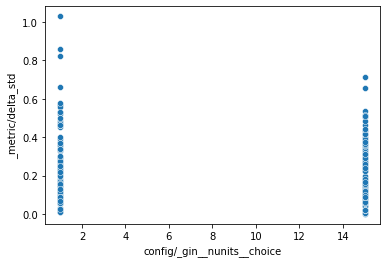

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
7                                   0                          0   
107                                 0                          0   
207                                 0                          0   
307                                 0                          0   
407                                 0                          0   
...                               ...                        ...   
9507                                0                          0   
9607                                0                          0   
9707                                0                          0   
9807                                0                          0   
9907                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
7                               1                      0.270150  
107                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



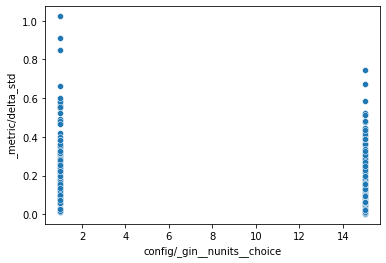

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
64                                  0                          0   
164                                 0                          0   
264                                 0                          0   
364                                 0                          0   
464                                 0                          0   
...                               ...                        ...   
9564                                0                          0   
9664                                0                          0   
9764                                0                          0   
9864                                0                          0   
9964                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
64                              1                      0.270150  
164                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



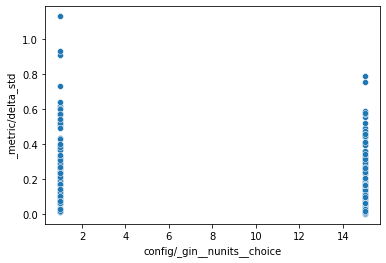

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
75                                  0                          0   
175                                 0                          0   
275                                 0                          0   
375                                 0                          0   
475                                 0                          0   
...                               ...                        ...   
9575                                0                          0   
9675                                0                          0   
9775                                0                          0   
9875                                0                          0   
9975                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
75                              1                      0.270150  
175                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



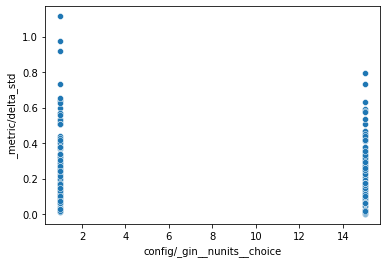

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
34                                  0                          0   
134                                 0                          0   
234                                 0                          0   
334                                 0                          0   
434                                 0                          0   
...                               ...                        ...   
9534                                0                          0   
9634                                0                          0   
9734                                0                          0   
9834                                0                          0   
9934                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
34                              1                      0.270150  
134                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



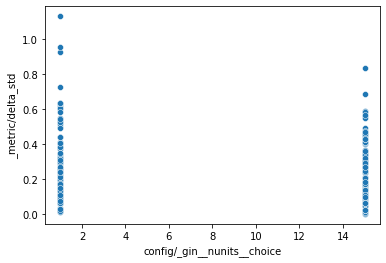

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
86                                  0                          0   
186                                 0                          0   
286                                 0                          0   
386                                 0                          0   
486                                 0                          0   
...                               ...                        ...   
9586                                0                          0   
9686                                0                          0   
9786                                0                          0   
9886                                0                          0   
9986                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
86                              1                      0.270150  
186                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



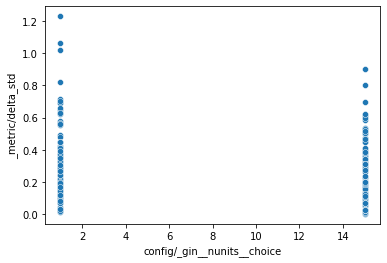

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
55                                  0                          0   
155                                 0                          0   
255                                 0                          0   
355                                 0                          0   
455                                 0                          0   
...                               ...                        ...   
9555                                0                          0   
9655                                0                          0   
9755                                0                          0   
9855                                0                          0   
9955                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
55                              1                      0.270150  
155                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



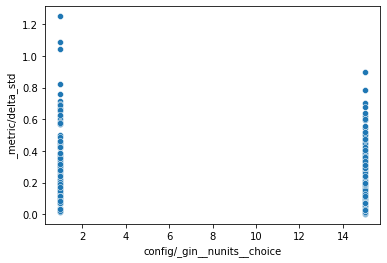

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
91                                  0                          0   
191                                 0                          0   
291                                 0                          0   
391                                 0                          0   
491                                 0                          0   
...                               ...                        ...   
9591                                0                          0   
9691                                0                          0   
9791                                0                          0   
9891                                0                          0   
9991                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
91                              1                      0.270150  
191                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



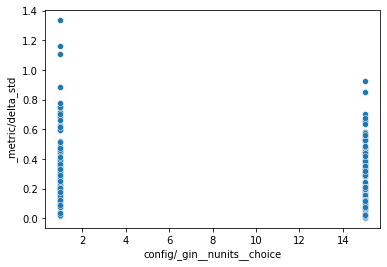

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
59                                  0                          0   
159                                 0                          0   
259                                 0                          0   
359                                 0                          0   
459                                 0                          0   
...                               ...                        ...   
9559                                0                          0   
9659                                0                          0   
9759                                0                          0   
9859                                0                          0   
9959                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
59                              1                      0.270150  
159                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



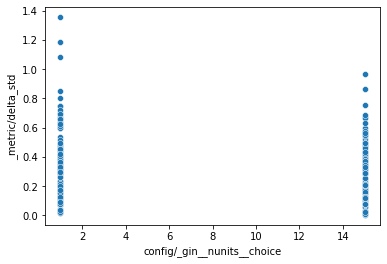

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
67                                  0                          0   
167                                 0                          0   
267                                 0                          0   
367                                 0                          0   
467                                 0                          0   
...                               ...                        ...   
9567                                0                          0   
9667                                0                          0   
9767                                0                          0   
9867                                0                          0   
9967                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
67                              1                      0.270150  
167                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



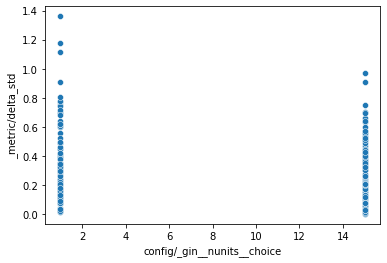

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
54                                  0                          0   
154                                 0                          0   
254                                 0                          0   
354                                 0                          0   
454                                 0                          0   
...                               ...                        ...   
9554                                0                          0   
9654                                0                          0   
9754                                0                          0   
9854                                0                          0   
9954                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
54                              1                      0.270150  
154                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



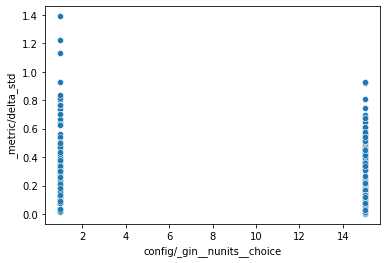

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
47                                  0                          0   
147                                 0                          0   
247                                 0                          0   
347                                 0                          0   
447                                 0                          0   
...                               ...                        ...   
9547                                0                          0   
9647                                0                          0   
9747                                0                          0   
9847                                0                          0   
9947                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
47                              1                      0.270150  
147                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



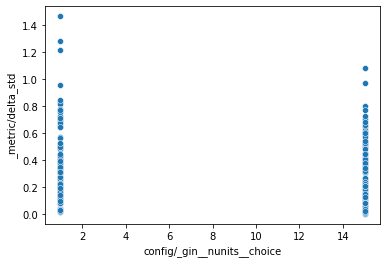

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
65                                  0                          0   
165                                 0                          0   
265                                 0                          0   
365                                 0                          0   
465                                 0                          0   
...                               ...                        ...   
9565                                0                          0   
9665                                0                          0   
9765                                0                          0   
9865                                0                          0   
9965                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
65                              1                      0.270150  
165                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



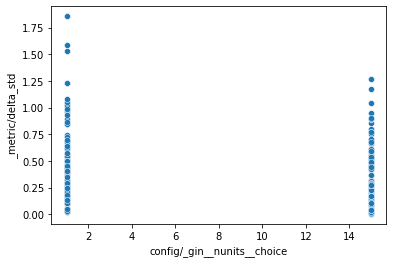

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
20                                  0                          0   
120                                 0                          0   
220                                 0                          0   
320                                 0                          0   
420                                 0                          0   
...                               ...                        ...   
9520                                0                          0   
9620                                0                          0   
9720                                0                          0   
9820                                0                          0   
9920                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
20                              1                      0.270150  
120                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



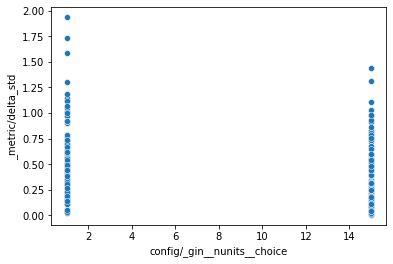

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
82                                  0                          0   
182                                 0                          0   
282                                 0                          0   
382                                 0                          0   
482                                 0                          0   
...                               ...                        ...   
9582                                0                          0   
9682                                0                          0   
9782                                0                          0   
9882                                0                          0   
9982                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
82                              1                      0.270150  
182                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



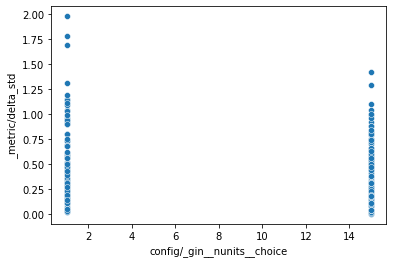

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
3                                   0                          0   
103                                 0                          0   
203                                 0                          0   
303                                 0                          0   
403                                 0                          0   
...                               ...                        ...   
9503                                0                          0   
9603                                0                          0   
9703                                0                          0   
9803                                0                          0   
9903                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
3                               1                      0.270150  
103                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



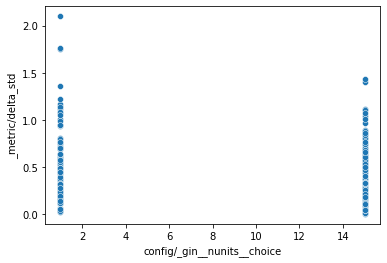

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
71                                  0                          0   
171                                 0                          0   
271                                 0                          0   
371                                 0                          0   
471                                 0                          0   
...                               ...                        ...   
9571                                0                          0   
9671                                0                          0   
9771                                0                          0   
9871                                0                          0   
9971                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
71                              1                      0.270150  
171                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



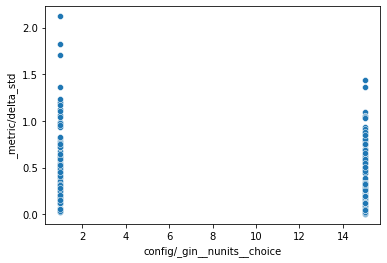

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
73                                  0                          0   
173                                 0                          0   
273                                 0                          0   
373                                 0                          0   
473                                 0                          0   
...                               ...                        ...   
9573                                0                          0   
9673                                0                          0   
9773                                0                          0   
9873                                0                          0   
9973                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
73                              1                      0.270150  
173                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



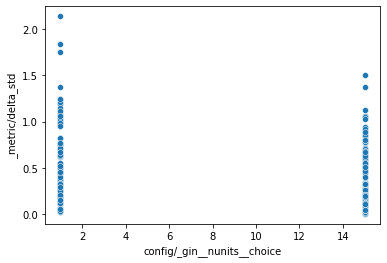

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
6                                   0                          0   
106                                 0                          0   
206                                 0                          0   
306                                 0                          0   
406                                 0                          0   
...                               ...                        ...   
9506                                0                          0   
9606                                0                          0   
9706                                0                          0   
9806                                0                          0   
9906                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
6                               1                      0.270150  
106                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



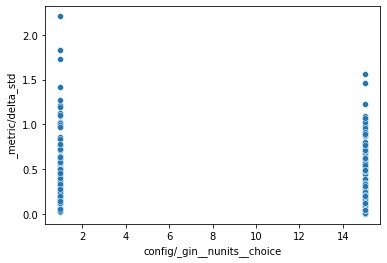

      config/_gin__lfail__sample_from  config/_gin__nhid__choice  \
31                                  0                          0   
131                                 0                          0   
231                                 0                          0   
331                                 0                          0   
431                                 0                          0   
...                               ...                        ...   
9531                                0                          0   
9631                                0                          0   
9731                                0                          0   
9831                                0                          0   
9931                                0                          0   

      config/_gin__nunits__choice  config/_gin__plevel__uniform  
31                              1                      0.270150  
131                             1                  

/home/sergei/miniconda3/envs/ft/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



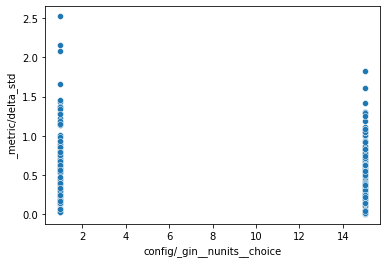

In [74]:
for inp, df_inp in df_all.groupby('_metric/input'):
#     print(df_inp.shape)
#     print(df_inp)
    df_inp = df_inp[df_inp['config/_gin__nhid__choice'] == 0]
    df_inp = df_inp[df_inp['config/_gin__lfail__sample_from'] == 0]
    print(df_inp[config_columns])
    sns.scatterplot(df_inp['config/_gin__nunits__choice'], df_inp['_metric/delta_std'])
    plt.show()
#     break